# NISAR data access, read, visualize (analyze coming soon). 

Import H5py package to read the NISAR h5 files and look at the data structure.

In [9]:
import h5py
import numpy as np
import glob
import os

In [11]:
from maap.maap import MAAP

maap = MAAP(maap_host="api.ops.maap-project.org")
username = maap.profile.account_info()["username"]
username

'sumantjha'

### Provide the location of NISAR h5 files.

In [12]:
nisar_path = "/projects/shared-buckets/sumantjha/nisar/expected"

In [13]:
os.chdir(nisar_path)

os.getcwd()

'/projects/shared-buckets/sumantjha/nisar/expected'

Initialize an empty variable to store name of all H5 files in the directory

In [14]:
nisar_list = []

In [15]:
for file in glob.glob("*.h5"):
    nisar_list.append(file)
    print(file)

NISAR_L1_PR_RIFG_001_001_A_001_001_0000_SHNA_A_20080218T062000_20080218T062016_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L1_PR_ROFF_001_001_A_001_001_0000_SHNA_A_20080218T062000_20080218T062016_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080218T062000_20080218T062016_D00310_P_F_001.h5
NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L1_PR_RUNW_001_001_A_001_001_0000_SHNA_A_20080218T062000_20080218T062016_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L2_PR_GCOV_001_001_A_001_0000_SHNA_A_20080218T062000_20080218T062016_D00310_P_F_001.h5
NISAR_L2_PR_GCOV_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L2_PR_GOFF_001_001_A_001_001_0000_SHNA_A_20080218T062000_20080218T062016_20080404T061917_20080404T061933_D00310_P_F_001.h5
NISAR_L2_PR_GSLC_001_001_A_001_0000_SHNA_A_20080218T062000_20080218T062016_D00310_P_F_001.h5
NISAR_L2_PR_GSLC_00

In [ ]:
#hf_in=h5py.File(nisar_list[1], 'r')

### We will import H5Glance package to visualize the structure of one of the NISAR *.H5 file

In [16]:
from h5glance import H5Glance

In [17]:
H5Glance(nisar_list[1])

NISAR_L1_PR_ROFF_001_001_A_001_001_0000_SHNA_A_20080218T062000_20080218T062016_20080404T061917_20080404T061933_D00310_P_F_001.h5/ (1 attributes)
└science	(1 children)

To do's: 
1. Extract bounds for the H5 file (science/lsar/identification/boundingPolygon)

In [18]:
hf_in_1=h5py.File(nisar_list[1], 'r')

In [19]:
bbox_1=hf_in_1['science']['LSAR']['identification']['boundingPolygon']

In [20]:
bbox_1.shape

()

#### Unfortunately, its empty. Which means, we have no idea where this data is from.Lets try to read next h5 file in the NISAR list and see if we have geometry to show on map. Before we can do that, we need to check the structure for that h5 file again.

In [21]:
hf_in_2=h5py.File(nisar_list[2], 'r')

In [22]:
H5Glance(hf_in_2)

NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080218T062000_20080218T062016_D00310_P_F_001.h5/ (6 attributes)
└science	(1 children)

In [23]:
hf_in_3=h5py.File(nisar_list[3], 'r')

In [24]:
H5Glance(hf_in_3)

NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5/ (6 attributes)
└science	(1 children)

So, it seems that the boundingPolygon field in the identification tree is empty as we are using Simulated NISAR. %% Confirmed this with Gerald at JPL.%% These empty fields will get populated once we have real NISAR data.

There is a geolocation tree with geographic information, that we will try to use next to visualize the location of these NISAR datasets. (['science']['RSLC']['metadata']['geolocationGrid']

In [25]:
hf_in_3['science']['LSAR']['RSLC']['metadata']['geolocationGrid']['coordinateX']

<HDF5 dataset "coordinateX": shape (20, 250, 90), type "<f8">

# Following JPL's suggestion of how to use gdal to convert given group to ENVI SLC format and visualize it. 

In [26]:
!gdalinfo HDF5:"/projects/shared-buckets/sumantjha/nisar/expected/NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5"://science/LSAR/RSLC/swaths/frequencyA/HH

Driver: HDF5Image/HDF5 Dataset
Files: /projects/shared-buckets/sumantjha/nisar/expected/NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5
Size is 9479, 35421
Metadata:
  contact=nisarops@jpl.nasa.gov
  Conventions=CF-1.8
  institution=NASA JPL
  mission_name=NISAR
  reference_document=TBD
  title=NISAR L1 RSLC Product
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,35421.0)
Upper Right ( 9479.0,    0.0)
Lower Right ( 9479.0,35421.0)
Center      ( 4739.5,17710.5)
Band 1 Block=9479x1 Type=CFloat32, ColorInterp=Undefined
  Metadata:
    science_LSAR_RSLC_swaths_frequencyA_HH_description=Focused SLC image (HH)
    science_LSAR_RSLC_swaths_frequencyA_HH_max_imag_value=2788 
    science_LSAR_RSLC_swaths_frequencyA_HH_max_real_value=1077 
    science_LSAR_RSLC_swaths_frequencyA_HH_mean_imag_value=0.174126982688904 
    science_LSAR_RSLC_swaths_frequencyA_HH_mean_real_value=-0.179290801286697 
    science_LSAR_RSLC_swaths_freque

In [27]:
!gdal_translate -of ENVI HDF5:"/projects/shared-buckets/sumantjha/nisar/expected/NISAR_L1_PR_RSLC_001_001_A_001_0000_SHNA_A_20080404T061917_20080404T061933_D00310_P_F_001.h5"://science/LSAR/RSLC/swaths/frequencyA/HH HH.slc

Input file size is 9479, 35421
0...10...20...30...40...50...60...70...80...90...100 - done.


In [28]:
!gdalinfo HH.slc

Driver: ENVI/ENVI .hdr Labelled
Files: HH.slc
       HH.slc.aux.xml
       HH.hdr
Size is 9479, 35421
Metadata:
  contact=nisarops@jpl.nasa.gov
  Conventions=CF-1.8
  institution=NASA JPL
  mission_name=NISAR
  reference_document=TBD
  title=NISAR L1 RSLC Product
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,35421.0)
Upper Right ( 9479.0,    0.0)
Lower Right ( 9479.0,35421.0)
Center      ( 4739.5,17710.5)
Band 1 Block=9479x1 Type=CFloat32, ColorInterp=Undefined
  Metadata:
    science_LSAR_RSLC_swaths_frequencyA_HH_description=Focused SLC image (HH)
    science_LSAR_RSLC_swaths_frequencyA_HH_max_imag_value=2788 
    science_LSAR_RSLC_swaths_frequencyA_HH_max_real_value=1077 
    science_LSAR_RSLC_swaths_frequencyA_HH_mean_imag_value=0.174126982688904 
    science_LSAR_RSLC_swaths_frequencyA_HH_mean_real_value=-0.179290801286697 
    science_LSAR_RSLC_swaths_frequencyA_HH_min_imag_value=-937.5 
    science_LSAR_RSLC_sw

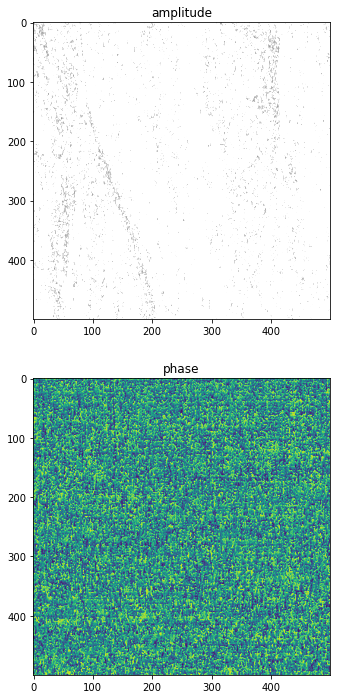

In [30]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

ds = gdal.Open("HH.slc", gdal.GA_ReadOnly)

# extract a subset of the SLC to display
x0 = 0
y0 = 10
#x_offset = 1000
#y_offset = 1000
x_offset = 500
y_offset = 500

#slc = ds.GetRasterBand(1).ReadAsArray()           
slc = ds.GetRasterBand(1).ReadAsArray(x0, y0, x_offset, y_offset)
#print(slc)
ds = None

#fig = plt.figure(figsize=(20, 30))
fig = plt.figure(figsize=(14, 12))

# display amplitude of the slc
ax = fig.add_subplot(2,1,1)
ax.imshow(np.abs(slc), vmin = -2, vmax=2, cmap='gray')
ax.set_title("amplitude")

#display phase of the slc
ax = fig.add_subplot(2,1,2)
ax.imshow(np.angle(slc))
ax.set_title("phase")

plt.show()